In [17]:
import gudhi as gd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from persim import PersImage

In [9]:
dataset = "ECG5000"
path       = dataset + "/"
list_filts = ["Alpha-DTM-0", "Alpha-DTM-1"]

X1 = np.array(pd.read_csv(path + dataset + "_TRAIN.tsv", sep="\t", header=None))[:30]
X2 = np.array(pd.read_csv(path + dataset + "_TEST.tsv",  sep="\t", header=None))[:30]
X = np.vstack([X1, X2])
split = len(X1)

Rips complex is of dimension 3 - 523685 simplices - 60 vertices.


<Figure size 640x480 with 0 Axes>

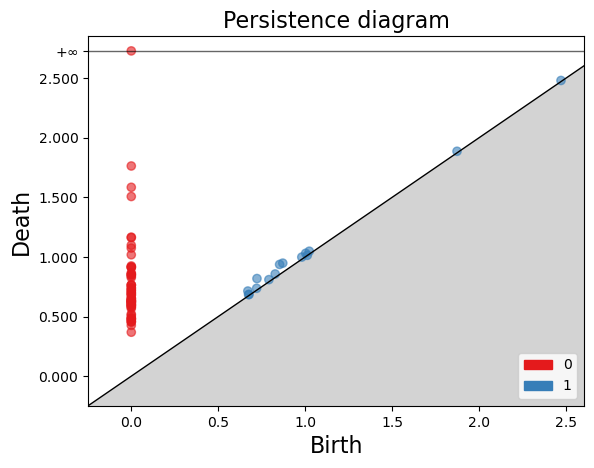

In [15]:
# Scale the DataFrame by the maximum value
max_value = X.max()
scaled_array = X / max_value

# compute the pariwise distance matrix
distance_matrix = np.linalg.norm(scaled_array[:, None] - scaled_array, axis=-1)

# Fill in the similarity diagonal # not sure whether it should be 1s or 0s
np.fill_diagonal(distance_matrix, 0)

# create the Rips complex and print inf
rips_complex = gd.RipsComplex(distance_matrix = distance_matrix)
simplex_tree = rips_complex.create_simplex_tree(max_dimension = 3)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'

persistence_results = simplex_tree.persistence()
plt.figure()
gd.plot_persistence_diagram(persistence_results)
plt.show()

In [20]:
# Convert the persistence diagrams to persistence images
pim = PersImage()
persistence_images = pim.transform(persistence_results)

# Plot the persistence image
plt.imshow(persistence_images, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Persistence Image')
plt.show()

PersImage(pixels=(20, 20), spread=None, specs=None, kernel_type="gaussian", weighting_type="linear")


/var/folders/1j/4ywvd0v15_l9pr0m8k4fhdcr0000gn/T/ipykernel_89029/3788708687.py:2: DeprecationWarning: Call to deprecated class PersImage. (Replaced with the class `persim.PersistenceImager`.) -- Deprecated since version 0.1.5.
  pim = PersImage()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (75, 2) + inhomogeneous part.